# 122108131



# EE6024

#         <font color=blue>A. SUMMARY<font>


This report illustrates the pipeline in the development of a machine learning model after data has been fetched. The goal here is to develop a binary classifier that is able to make discrepancies between Normal Heart condition and Heart Disease condition given a set of features for a patient these features are age, sex, resting ecg, etc. The features 11 in total, and are shown in cell 2 after extracting the csv into a pandas DataFrame object. The data is provided from IEEE Datapoint The nature of the features are nominal, binary and numeric. These were handled accordingly. Nominal data has no order or trend as opposed to ordinal data, and as such such be handled accordingly. One hot encoding was used to transformed nominal and binary data.  

Every relevant library needed for this assignment was imported in cell 1, the report also does justice to data visualization and exploration using barcharts and pie-chart to investigate some trends and have an idea of the distribution. Two classifier algorithms were looked into to create a reliable binary classifier, logistic regression and support vector machine. In logistic regression the aim is to fit an s-curve or logit function that calculates the probability of an instance occuring in a class or otherwise. Support vector machine on the other hand tries to fit a hyperplane that can accurately sepearte all classes given the datapoints plotted in a n-dimensional space. The report contains every code correctly commented with docstrings of custom function included.

In this report dimension reduction algorithms were applied to make the logistic regression model fair well after standardization had been performed to even out every feature on the same similar scale (i.e Standardiztion). Logistic regression model are negatively affected by multicollinearity, that was the reason for performing dimension reduction, not only do the number of features reduce so also does multicollinearity and this was shown using heat maps before and after dimension reduction. PCA a linear dimension reduction technique and IsoMap embedding an embedded dimension reduction technique were compared and PCA was chosen because the trade off in complexity and accuracy was fair. For the training process hyperparamter tunning was used to reduce bias, and improving accuracy scores. Every code used is explained and process/techniques used explained explicitly.

The report is capped off with performance and analysis report of both classification models. And the report ends finally with a conclusion

## Import  relevant libraries/modules

pandas is used for creating and handling DataFrame objects, numpy is used for mathematical and scientific operations involing arrays (numpy arrays). Matplotlib is a library used for visualizing data and plots, the pyplot module often imported as `plt` is used for this.` StandardScaler` class was also used imported from the `preprocessing` module of the sklearn library. `Seaborn` often imported as `sns` is used for a more beautiful plot representation. The `PCA` class was also used in this assignment, imported from the `decomposition` module in `sklearn`. `train_test_split` function and `LogisticRegression` class were imported from sklearn's `model_selection` and `linear_model` modules respectively.
`IsoMap` class was imported sklearns `manifold` module for non-linear dimension reduction.

`classification_report` from the metrics module in `sklearn` builds a text report showing the main metrics of the classifier model, metrics include Precision, recall, f1-score and support. the `confusion_matrix` function was imported and used to create the confusion matrix of the classifier models reporting the numbers of true positives, true negatives, false positives and false negatives. The `ConfusionMatrixDisplay` class was imported for confusion matrix visualization. The `timeit` module provides a systematic and reliable way of measuring execution of python expressions as opposed to using time.time(). `roc_auc_score` and `roc_curve` were used in the report to get receiver operating characteristic curves and area under the curve values. 'GridSearchCV' is a class in the model_selection module of `sklearn` to perform hyperparamter tunning via GridSearchCV search all combinations for optimal performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import Isomap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC 
import timeit
#style argument set to `ticks` here to enable grid lines show
sns.set(style='ticks')


## Load data using pandas

The read_csv() method was used to load the data onto a pandas dataframe, the filename with the file extension is passed as an argument. For ease both the notebook and csv data must be in the same directory

In [2]:
#directory is passed as an argument type is string.
dataset = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

#view the fetched data
dataset

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


#         <font color=blue>B. DESCRIPTION AND JUSTIFICATION OF DATA MANIPULATION SCHEMES IMPLORED<font>

##      <font color=blue>B.1 Data visualization<font>


Data visualization is very important aspect that cannot be overlooked in machine learning. Data visualization gives the developer a feel of what the data says and how to interpret the data to build machine learning models. Charts, graphs, plots, etc provide more understanding and insight to the relevance of features in building machine learning models. Histograms were used in this report to demonstrate the distribution of the features (the numeric types e.g age) in this health dataset

### Visualization of numeric features using histograms

C:\Users\chigo\AppData\Local\Temp\ipykernel_6868\3733484224.py:20: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  numeric_dataset.hist(ax=ax)


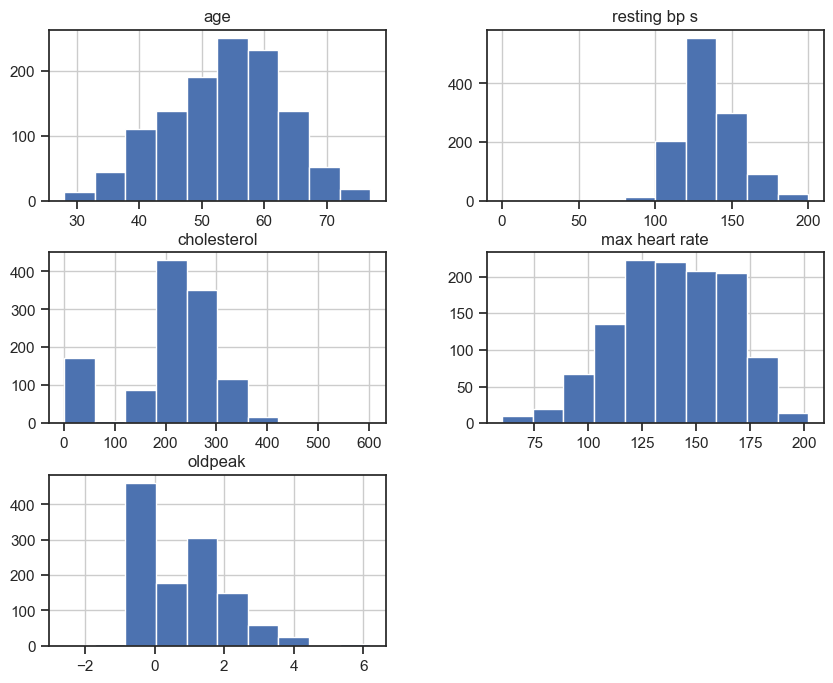

In [3]:
#the list `numeric` contains column names (string) of all
#numeric data types
numeric = [
    'age', 'resting bp s', 'cholesterol', 'max heart rate',
    'oldpeak'
    ]

#a pandas dataframe frame called `numeric_dataset` was created needed to plot
#multiple histograms in one figure
numeric_dataset = dataset.loc[:, numeric]

#sets the dimension of the figure 10 x 8 passed as a tuple, keyword argument 
#`figsize`
fig = plt.figure(figsize = (10,8))

#gets current axes to enable subplots 
ax = fig.gca()

#creates subplots of histogram of columns in `numeric_dataset``
numeric_dataset.hist(ax=ax)

#display all currently open figure to the notebook
plt.show()

### Visualization of Nominal and Binary data using pie charts

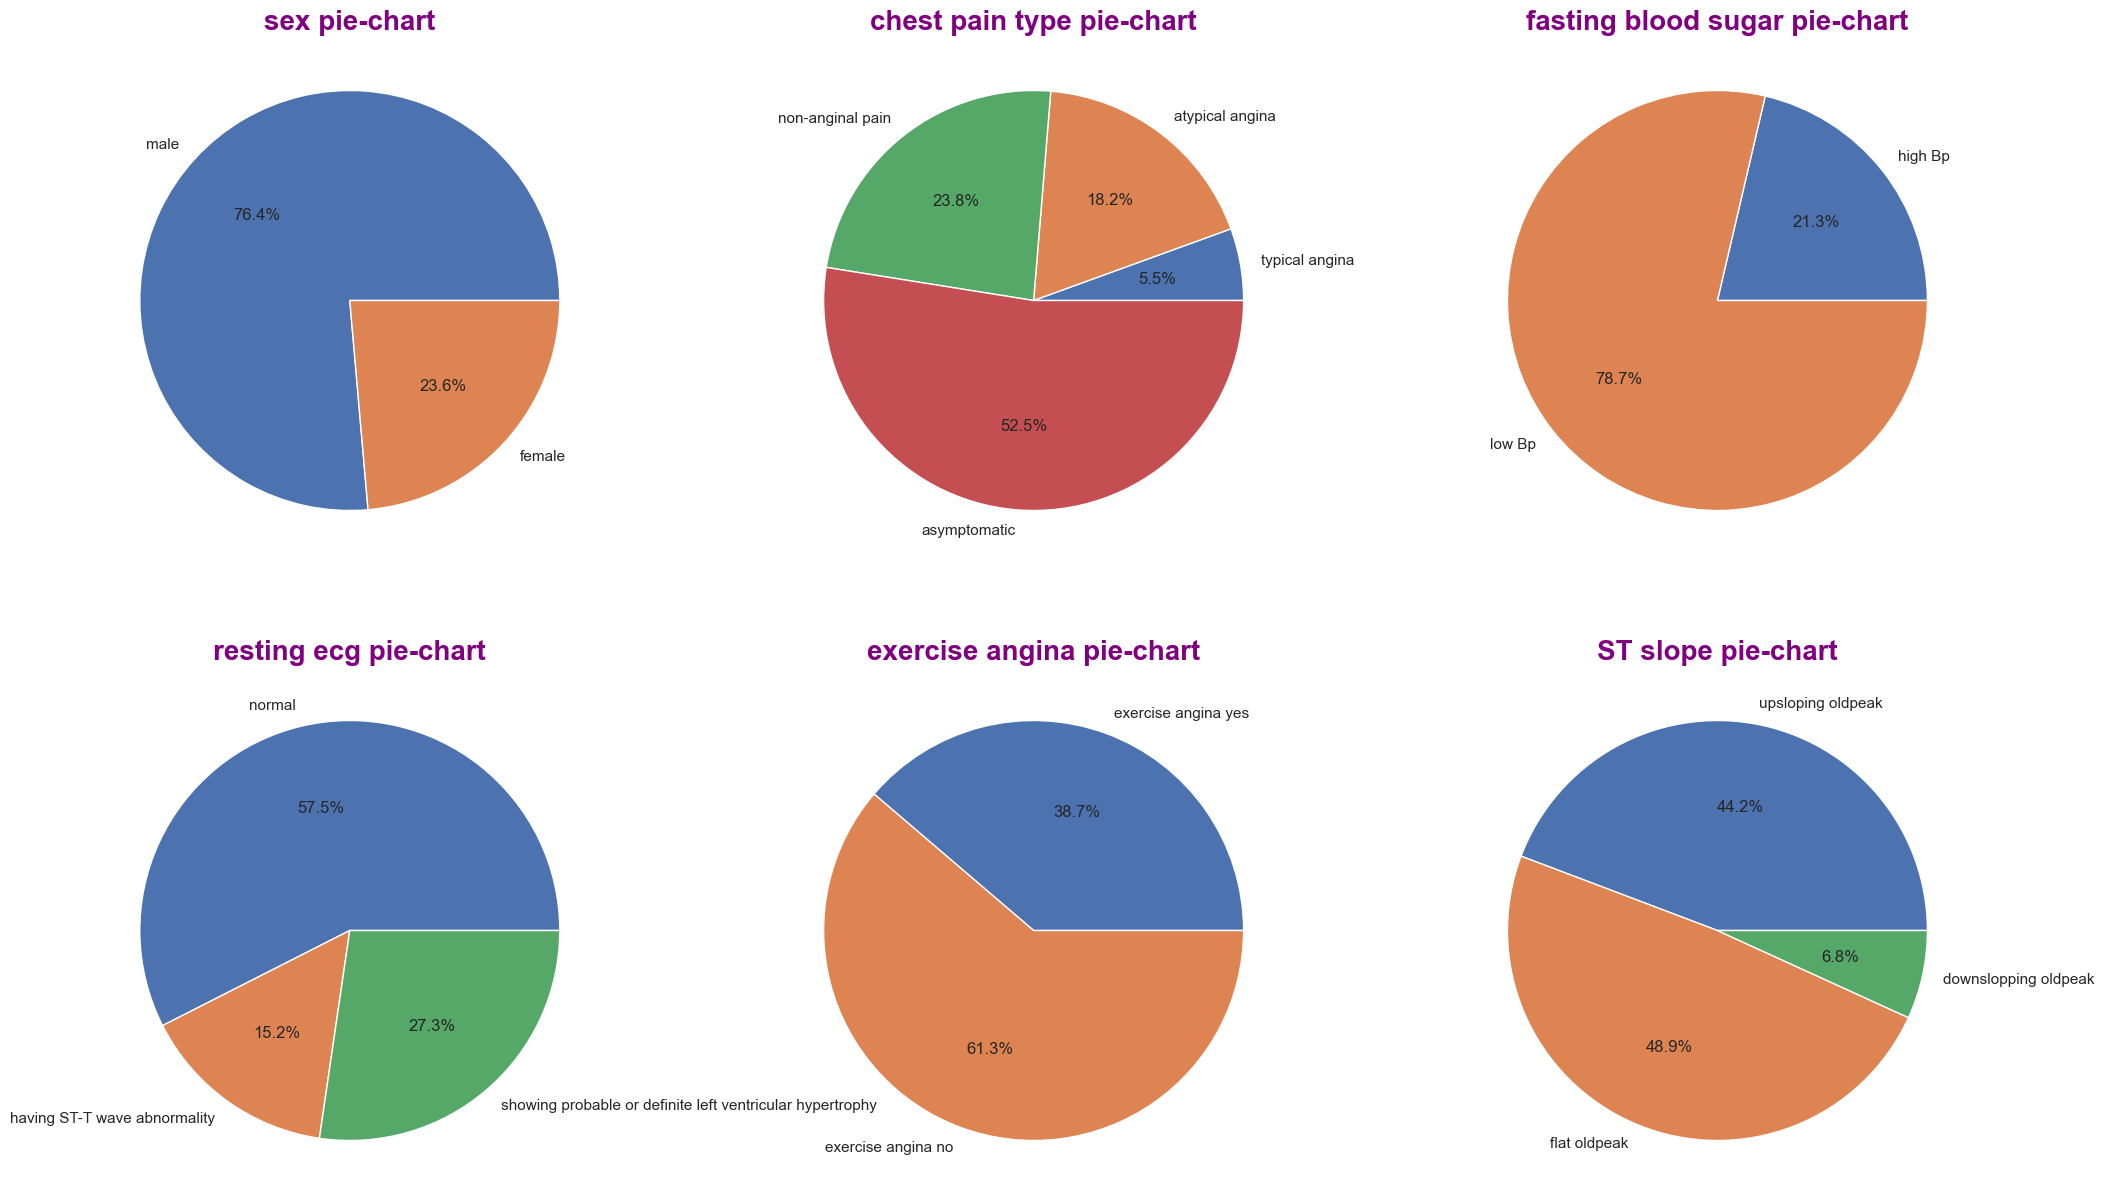

In [4]:
#dictionaries named _map_1 to _map_6 were created for all nominal and binary 
#features of the dataset the nominal or binary values of each feature
# are used as keys
#while the corresponding interpretations are the corresponding values to the
#keys of the dictionaries. i.e _map_1 represents sex, the key 1 corresponds 
#to male while 0 corresponds to female and so on...
_map_1 = {
    1 : 'male',
    0 : 'female',
}

_map_2 = {
    1: 'typical angina',
    2: 'atypical angina',
    3: 'non-anginal pain',
    4: 'asymptomatic',
}

_map_3 ={
    1: 'high Bp',
    0: 'low Bp'
}

_map_4 = {
    0: 'normal',
    1: 'having ST-T wave abnormality',
    2: 'showing probable or definite left ventricular hypertrophy',

}

_map_5 = {
    1: 'exercise angina yes',
    0: 'exercise angina no'
}


_map_6 = {
    1: 'upsloping oldpeak',
    2: 'flat oldpeak',
    3: 'downslopping oldpeak',
}

#a list housing all the maps _map_1 to _map_6 created called 
#`nominal_binary`
nominal_binary = [_map_1, _map_2, _map_3, 
                  _map_4, _map_5, _map_6, 
                  ]

#a list `nominal_binary_labels` containing strings that represent the
#map in `nominal_binary` these are the columns names for that have 
#nominal or binary data
nominal_binary_labels = ['sex', 'chest pain type', 
                         'fasting blood sugar', 'resting ecg',
                         'exercise angina', 'ST slope'
                         ]


#a function that can automate plotting multiple piecharts of the non-numeric 
#data types in one single plot...(subplotting)
def plot_pie_charts(df, lst_1, lst_2):

    ''' 
    Custom function to automate plotting of pie charts to describe nominal
    and binary features of the health data set

    Parameters:
        df (DataFrame): pandas Dataframe
        lst_1 (list): list of all maps `_map_1` to `_map_6`
        lst_2 (list): list of all features that are nominal or binary
                        in the dataframe df. type of each element in string

    Returns:
        None

    '''

    #dim is a list of tuples-coordinates used to position each subplot
    dim = [
        (0, 0), (0, 1), (0, 2),
        (1, 0), (1, 1), (1, 2)
    ]
    fig = plt.figure(figsize=(25, 15))

    #for loop to handle every noimal and binary feature in the dataset
    for i in range(len(lst_1)):
        #freqs, i.e occurs of a particular nominal observation in the dataset
        freqs = []

        #the labels of all nominal and binary features which is needed in the
        #pie chart
        labels = []

        #for loop to iterate through the nominal or binary instances of the 
        #nominal and binary features 
        for key, values in lst_1[i].items():

            #append to the labels list crteated before the start of the
            # for loop
            labels.append(values)

            #get count of occurrences where the nominal or binary instance has
            #the value required i.e eg where sex == 1 for male 
            #or resting_ecg == 0 for normal
            count = (df[str(lst_2[i])] == key).sum()
            freqs.append(count)
            #the first argument (2, 3) implies the figure would
            #have subplots organized in two rows and three columns
            #dim[i] is the coordinate of each subplot created using
            #`subplot2grid`
            axis = plt.subplot2grid((2, 3), dim[i])

            #.pie() method is used to plot pie charts. the values are in freqs
            #the labels are `labels` and `autopct` is set accordingly to add
            #percentages in the pie chart
            plt.pie(freqs, labels=labels, autopct='%1.1f%%')

            #plt.title() method was used to tile each subplot
            plt.title(
                f'{lst_2[i]} pie-chart', color='Purple', 
                fontsize=20, fontweight='bold'
            )
    
    #plt.show() displays plots onto the notebook
    plt.show()

plot_pie_charts(dataset, nominal_binary, nominal_binary_labels)

### <font color=red>Explore target classes to check if there is an imbalance!<font>

In [5]:
dataset['target'].value_counts()

1    629
0    561
Name: target, dtype: int64

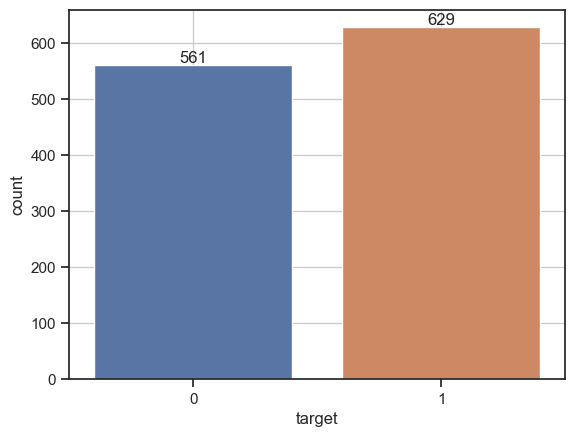

In [6]:
ax = sns.countplot(x='target', data=dataset,)
abs_vals = dataset['target'].value_counts(ascending=True).values
ax.bar_label(container=ax.containers[0], labels=abs_vals)
plt.grid()
plt.show()

`0` stands for Normal


`1` stands for Heart Disease

No significant imbalance observed No need to upsample any target class instances. in the even of an imbalance between both classes upsampling or down sampling could be a solution to fix this, it is import for the model to be trained with sufficient data from both classes in order for it to be able to generalize in the field. SMOTE (Synthetic Minority Overampling Technique)is a upsampling technique commonly used, while for for downsampling a sample of the data set can be taken for every n datapoints. 

##       <font color=blue>B.2 Data preprocessing<font>

Data preprocessing is a very crucial stage in machine learning pipelines that should not be overlooked. With the right data preprocessing reliability, consistency, and accuracy of machine learning models can be improved; often times data contains redundancy, noise, etc. and these should be all handled appropriately. The following cells show the techniques/procedure used to process the dataset

Handling NaN values:



In [7]:
#check if there nan values using the code. The .isna() and .sum() method 
#are used .isna() returns a bool value for NaN values present in every 
#column of the dataset. Then .sum() returns the total number of NaN values 
#present in each column. NaN stands for Not A Number.
dataset.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

No NaN records present in this dataset

### Standardize dataset

Since predictors/features are usually on different scales for example weight (kgs) and distance (m) it is common practice and advisible to standardize so that features are brought to the same scale  or normalized features to ensure homogeneity. Normalization is often prefered in cases where the distribution of the features are unknown (that is when there do not follow the Gaussian distribution), age and resting bp s are somewhat gaussian while the others arent as shown in the histogram plotted earlier. Standardization is done otherwise, even if Normalization is prefered for gaussian distribution all across the board, standardization can still be implored especially when dimension reduction is going to be applied, which was done for this assignment. Standardization is done is such a way to make the mean of the standardized feature `0` and the standard deviation `1`

assumming the dataset has the same distribution as future dataset it is safe to standardize!!!!! This should make sense for the nature of data being handled as it is health data that has to do with the heart and the distribution should not change too much in the future

In [8]:
#std is a StandardScaler object
std = StandardScaler()

#the fit_transform method is used to apply standardization transforming
#the pandas Dataframe and fitting it into a numpy array `X`
#the columns needed to be standardized are passed as a dataframe argument
X = std.fit_transform(dataset[['age', \
                               'resting bp s', 'cholesterol', \
                                  'max heart rate', 'oldpeak', ]])

In [9]:
#A pandas dataframe is created using the np array from the previous cell
#The columns are assigned 
#accordingly: <DataFrame_name>[<column_name>] = X[<slice>]
dataset['age'] = X[:, 0]
dataset['resting bp s'] = X[:, 1]
dataset['cholesterol'] = X[:, 2]
dataset['max heart rate'] = X[:, 3]
dataset['oldpeak'] = X[:, 4]

In [10]:
#view top 5 rows to confirm the DataFrame is as expected
dataset.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,-1.466728,1,2,0.427328,0.775674,0,0,1.265039,0,-0.849792,1,0
1,-0.504600,0,3,1.516587,-0.299512,0,0,0.637758,0,0.071119,2,1
2,-1.787437,1,2,-0.117301,0.716489,0,1,-1.636136,0,-0.849792,1,0
3,-0.611503,0,4,0.318402,0.035867,0,0,-1.244085,1,0.531575,2,1
4,0.029915,1,3,0.971958,-0.151550,0,0,-0.695214,0,-0.849792,1,0


### Handle nominal data using one-hot encoding

In order to process nominal data or binary data one-hot encoding must be peformed as opposed to mapping which is used for ordinal data. Nominal data are those categorical data that have no ordering, that is one state or class is not necessarily superior to the other. One-hot encoding is brilliant for nominal data especially when developing deep learning models. In One-hot encoding the categories are spread out and the occurence of one of the nominal category per instance of the data set is recorded as a 1 in that column and a 0 otherwise so Sex would be split into `Male` and `Female` and a female patient would now record Male 0 and female 1. It is common practice after one hot encoding to drop one of the new columns to avoid `dummy varibale trap` but most classifier models are smart enought to handle these. No columns were dropped after one-hot encoding in this assignment

In [11]:
#the same maps created previously in cell 4 are used here to replace the 
#values 0, 1, 2, 3 given to the different categories with their actual 
#interpretation 
dataset['sex'] = dataset['sex'].map(_map_1)
dataset['chest pain type'] = dataset['chest pain type'].map(_map_2)
dataset['fasting blood sugar'] = dataset['fasting blood sugar'].map(_map_3)
dataset['resting ecg'] = dataset['resting ecg'].map(_map_4)
dataset['exercise angina'] = dataset['exercise angina'].map(_map_5)
dataset['ST slope'] = dataset['ST slope'].map(_map_6)

In [12]:
#this custom function is used to apply one-hot encoding to all the columns
#features thar require them...i.e the nominal and binary ones
def onehot_transformation(column_name):

    '''
    Perfoms one-hot encoding on specified column/feature, concatenates
    to 'dataset' DataFrame and drops the previous column/feature passed
    as the argument from the 'dataset' DataFrame

    Parameters:
        column_name(str): name of the column/feature that requires one-hot 
        encoding

    Returns:
        None
    '''

    #global is used to effect changes on the dataset variable from within the
    #function
    global dataset

    #get_dumies() convertes variable/column into indicator variables
    df_new = pd.get_dummies(dataset[column_name])

    #concat method is used to concatenate two dataframes, axis argument
    #specifies in what direction the concatenation is done
    dataset = pd.concat([dataset, df_new], axis='columns')

    #.drop() method drops the column here and return the new DataFrame into
    #the global dataset variable
    dataset = dataset.drop([column_name], axis='columns')

In [13]:
#the function 'onehot_transformation' created in the previous cell
#is called and the features of the health dataset that needs to be transformed
#are passed as arguments
onehot_transformation('sex')
onehot_transformation('chest pain type')
onehot_transformation('fasting blood sugar')
onehot_transformation('resting ecg')
onehot_transformation('exercise angina')
onehot_transformation('ST slope')


In [14]:
#the Dataframe.head() method is used to view the dataframe, 
#3 is passed as an argument to view the first 3 rows
dataset.head(3)

,age,resting bp s,cholesterol,max heart rate,oldpeak,target,female,male,asymptomatic,atypical angina,...,high Bp,low Bp,having ST-T wave abnormality,normal,showing probable or definite left ventricular hypertrophy,exercise angina no,exercise angina yes,downslopping oldpeak,flat oldpeak,upsloping oldpeak
0,-1.466728,0.427328,0.775674,1.265039,-0.849792,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
1,-0.504600,1.516587,-0.299512,0.637758,0.071119,1,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,-1.787437,-0.117301,0.716489,-1.636136,-0.849792,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,1


## Multicollinearity and the 'Curse of Dimensionality'

Multicolinearity is the existence of strong correlation between feature/predictor variables. This is highly undesired in creating machine learning model as it can seriously hamper performance increasing variance in real world testing due to the fact that the trained model would find it hard to quantitify the effect of the weights of the independent variables in the regression model. A correlation matrix is often used to investigate collinearity. The correlation matrix contains all values of the correltion between predictors. The correlation matrix is visually represented by a heatmap often times as it easily paints a picture of multicollinearity in the dataset. 

Another thing to be weary of before training a machine learning model is the `curse of dimensionality`. The curse of dimensionality originally introduced by Richard E, Bellman describes the burden on computation of models with increasing dimensions of data. In a regression model the increased data points would imply more weights, also the number of data points increases exponentially to meet up with performance. Dimension reduction can be done to cater to the curse of dimensionality, and fortunately it also caters to multicollinearity as the correlation between new transformed features are very low (close to zero). 

Examples of dimension reduction algorithms include linear algebra methods like Principal Component Analysis (PCA), Singular value decomposition, and Manifold learning methods like Isomap embedding, Locally linear embedding etc. PCA and IsoMap embedding were used in this assignment

###     	Exploring multicollinearity using heatmap

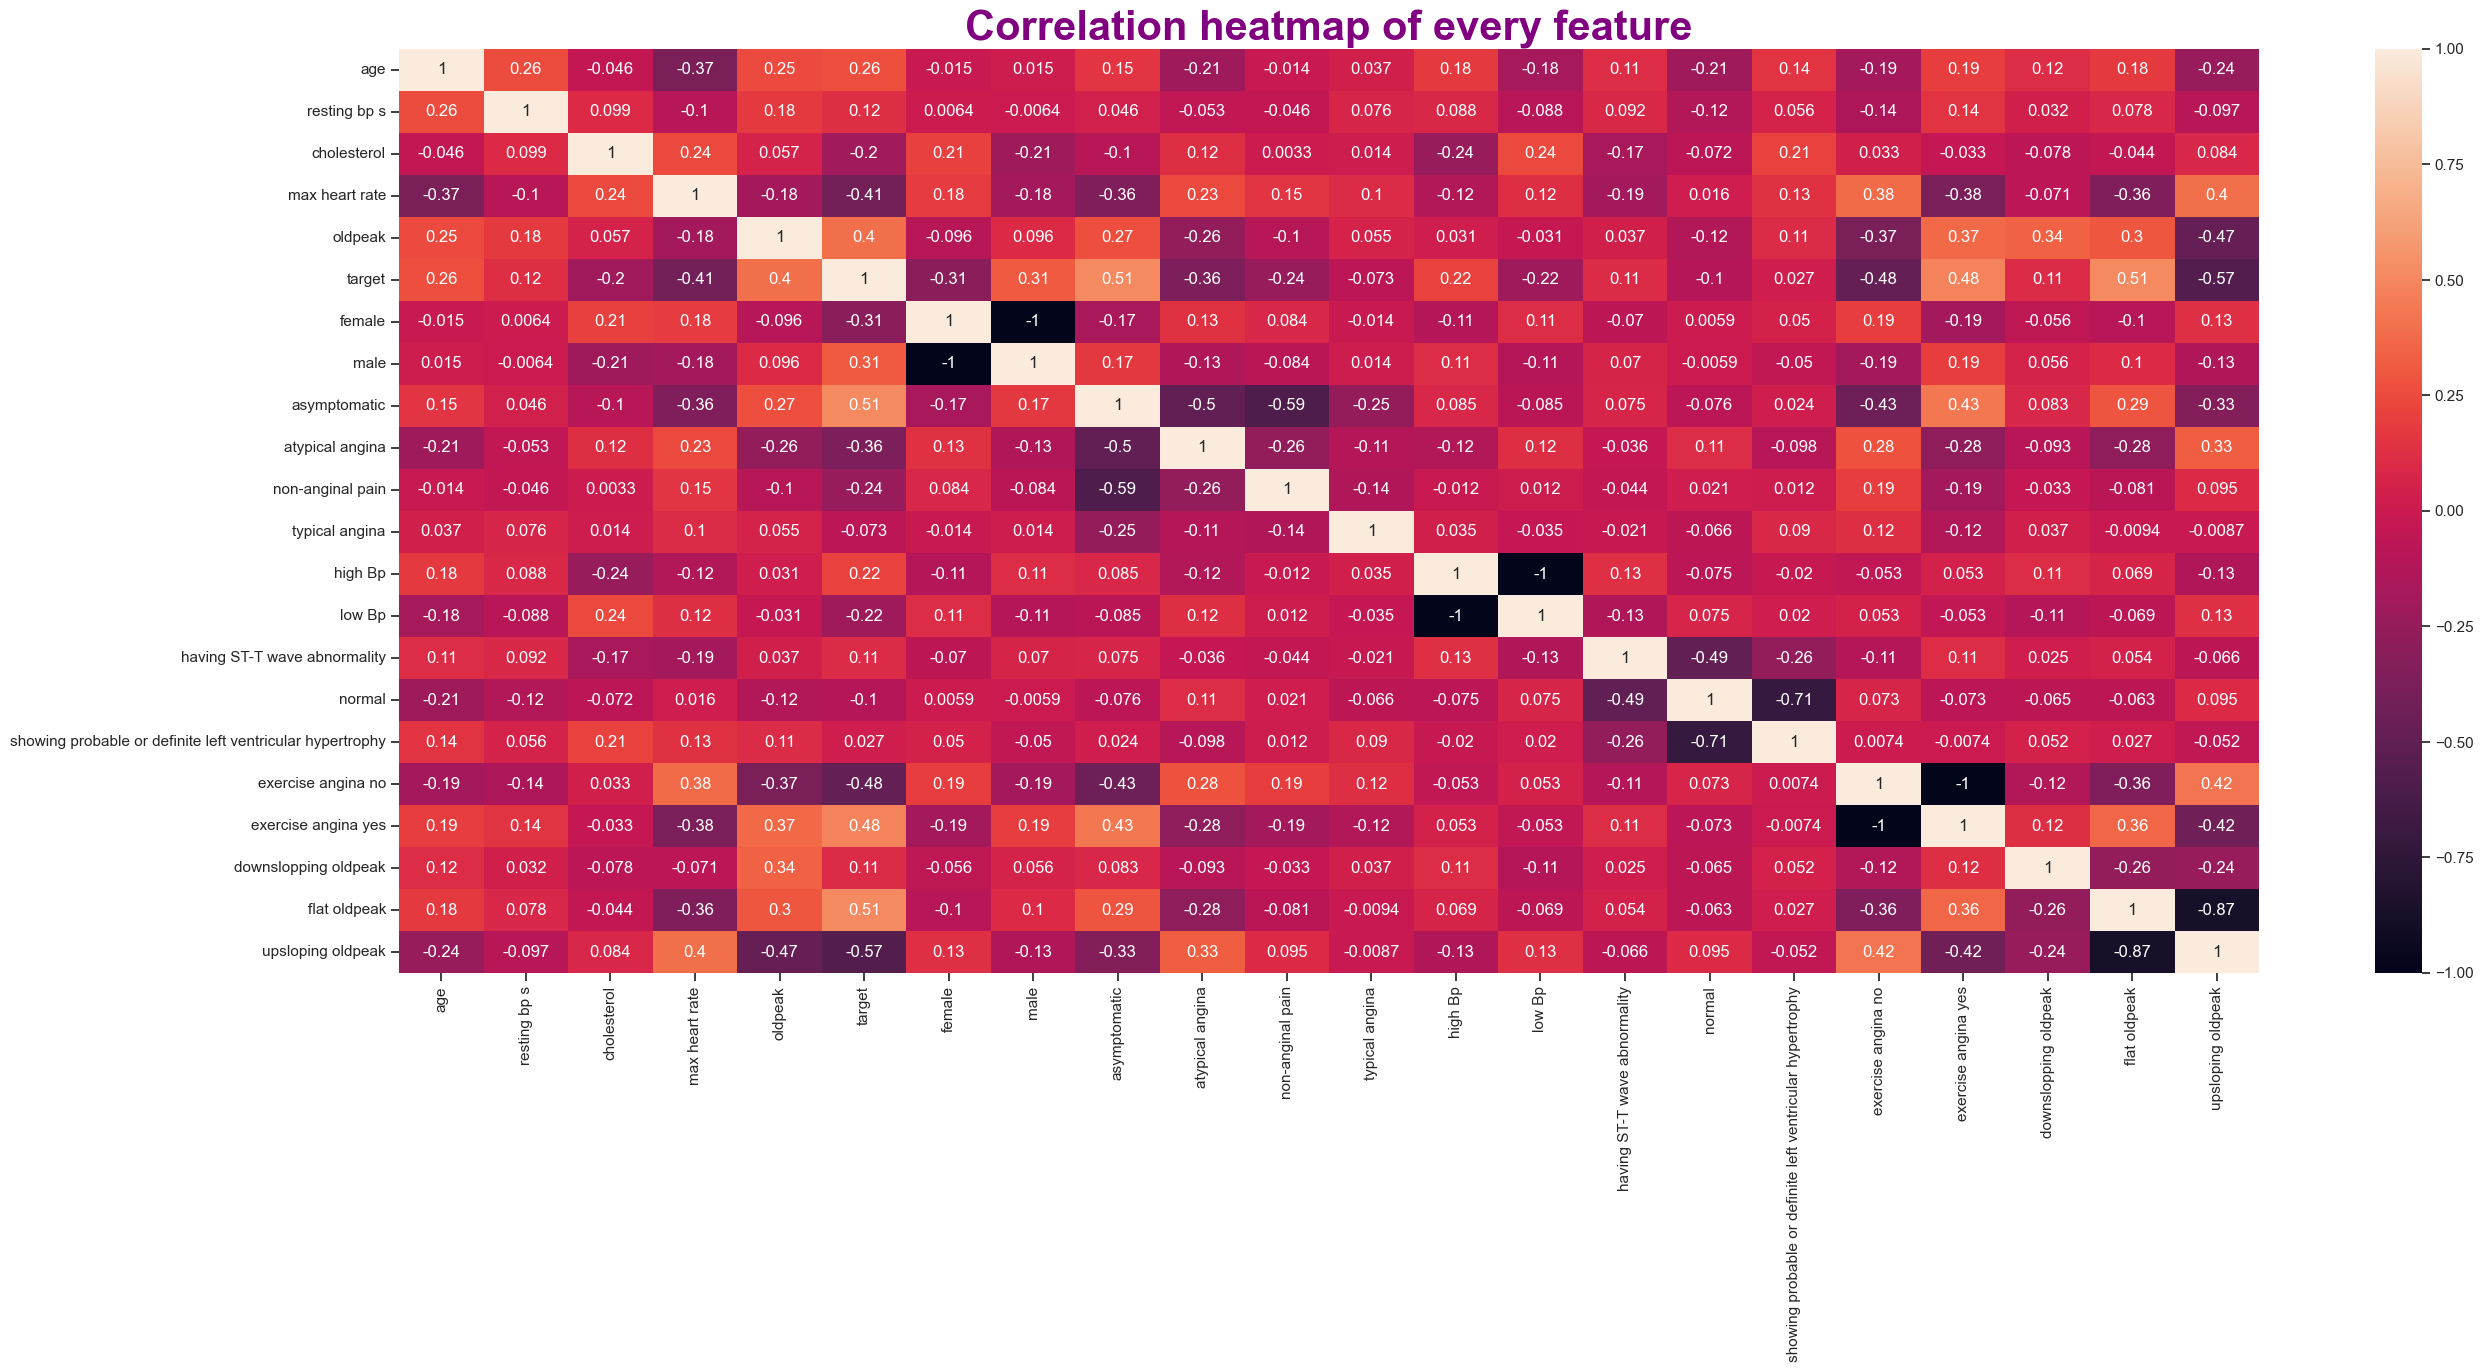

In [15]:
#plot figure, figure size (tuple)  is passed as a keyword argument
plt.figure(figsize=(30, 12))

#title of the heat map, color of title was set to purple and bolded
#and fontsize was set to 30 to make the title standout
plt.title(
    'Correlation heatmap of every feature', fontweight='bold',
    color='Purple', fontsize=30
    )

#the seasborn module was used to plot the heatmap of the matrix returned by 
#calling the dataset.corr() passed as an argument
sns.heatmap(dataset.corr(), annot=True)

#plt.show() ensures the plotted figure is shown on the notebook
plt.show()

###     	Separate Predictor matrix and target vector

In [16]:
#the .values() method returns a numpy array 
y = dataset['target'].values

#the .drop() method takes off the portion of the dataframe
#rows or columns then the .values() method returns a numpy array
#of that dimension
X = dataset.drop(['target'], axis='columns').values


####    	what is PCA and Isomap embedding?
PCA is a linear algebra dimension/feature extraction technique used in data preprocessing prior to model training. PCA entails transforming the coordinate system into a new one, where most of the variation in the data can be accounted for by fewer dimensions. In PCA the `covariance matrix` is derived from the `Z-matrix` which is the standardized version of the predictor matrix; this covariance matrix is the product of the `Z-matrix` and its transpose. Then eigendecomposition is done, calculating eigenvectors and eigenvalues. These are then sorted, the eigenvectors are independent of each other hence multicollinearity is eliminated! PCA was implemented below.

IsoMap on the other is way more complicated but perform dimension reduction/feature extraction but is more computationaly complex.

### 	Apply PCA (Principal Component Analysis)

In [17]:
#PCA class imported earlier is used to create a PCA object
#n_components set to none here meaning it will attempt to capture all
#Principal components up to the number N_features of the dataset
pca = PCA(n_components=None)

#fits the model with X, passed as an argument
pca.fit(X)

#display Eigenvalues
print('Eigenvalues of covariance matrix are:')
print(pca.explained_variance_)
print('\n\n\n')
#variance % in percentage
print(' Variance (%)')
print(pca.explained_variance_ratio_ * 1000)


Eigenvalues of covariance matrix are:
[2.04179871e+00 1.25934694e+00 9.20401275e-01 7.30505148e-01
 6.53840582e-01 3.92285373e-01 3.27375035e-01 3.14202852e-01
 3.00585747e-01 2.78327129e-01 2.40536422e-01 1.81380537e-01
 1.58918658e-01 7.64546502e-02 6.50220033e-02 2.76685057e-04
 3.40073586e-32 1.40312870e-32 6.79191373e-33 3.79055393e-33
 1.46766127e-33]




 Variance (%)
[2.57112762e+02 1.58582806e+02 1.15901196e+02 9.19885957e+01
 8.23346381e+01 4.93983933e+01 4.12245825e+01 3.95658801e+01
 3.78511511e+01 3.50482427e+01 3.02894617e+01 2.28402782e+01
 2.00117744e+01 9.62752407e+00 8.18787217e+00 3.48414653e-02
 4.28236429e-30 1.76688472e-30 8.55269272e-31 4.77324127e-31
 1.84814712e-31]


### 	 plot to show cummulative sum of percentage of variablity contributed by all successive principal components

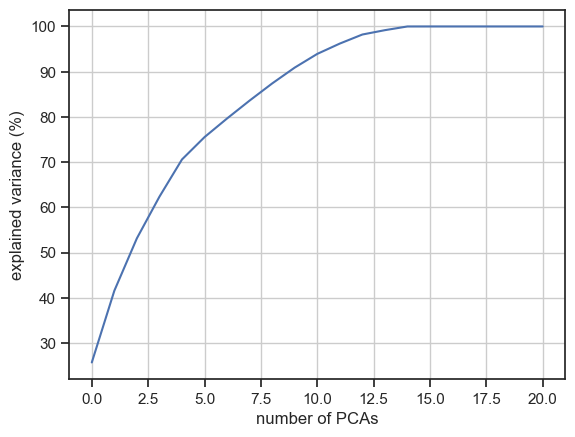

In [18]:
#np.cumsum() performes cummulative sum of numpy array 
#multiplied by 100 to scale in percentage
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))

#x label
plt.xlabel('number of PCAs')

#y label
plt.ylabel('explained variance (%)')

#ensures there are grid lines in the plot
plt.grid()

#displays all open figures/plot
plt.show()

The first 8 principal components cummulatively capture just under 90% of the variability of the data. The 8 first Principal components were then extracted

In [19]:
#PCA object created numnber of components = 8
pca = PCA(n_components=10)

#fit model with X and apply dimensional reduction on X
X_pca = pca.fit_transform(X)

#print the new predictor and its shaped reduced from 21 columns to 8 columns
print(f'New predictors are: {pd.DataFrame(X_pca).head(5)}')
print('.... \n\n\n')
print(X_pca, '\n\n\n')
print(
    f'Shape of new predictor matrix is: {X_pca.shape}, previously {X.shape}!'
    )

New predictors are:           0         1         2         3         4         5         6  \
0  2.259342 -0.755551 -0.294843  0.753485 -0.676504  0.123787 -0.582984   
1  0.302578 -0.766517 -0.774463  1.271418 -0.069400  0.965520  1.032687   
2  0.966259  0.480508 -0.028277 -0.259968 -2.066000  0.376362  0.509809   
3 -1.025444  0.087622  0.728918  0.207757 -1.309498  0.663236  0.656861   
4  0.210674  0.187586 -1.426477  0.111223 -0.667394  0.779507 -0.291811   

          7         8         9  
0 -0.215570  0.192994 -0.075815  
1  0.952307  0.105140 -0.526002  
2 -1.810054  0.244530  0.299361  
3  0.705113 -0.645078  0.409798  
4 -0.524142  0.295402 -0.528570  
.... 



[[ 2.25934198 -0.75555146 -0.29484348 ... -0.21557014  0.19299368
  -0.07581511]
 [ 0.30257844 -0.7665165  -0.77446318 ...  0.95230679  0.10513991
  -0.52600177]
 [ 0.96625925  0.48050752 -0.02827693 ... -1.81005426  0.24452989
   0.2993605 ]
 ...
 [-1.34491101  0.96362421  0.39945341 ...  0.48098542 -0.33900489
  

####    	 USE HEATMAP TO INVESTIGATE MULTICOLINEARITY OF the 10 PCAs

<AxesSubplot:title={'center':'Correlation heatmap of Principal Components'}>

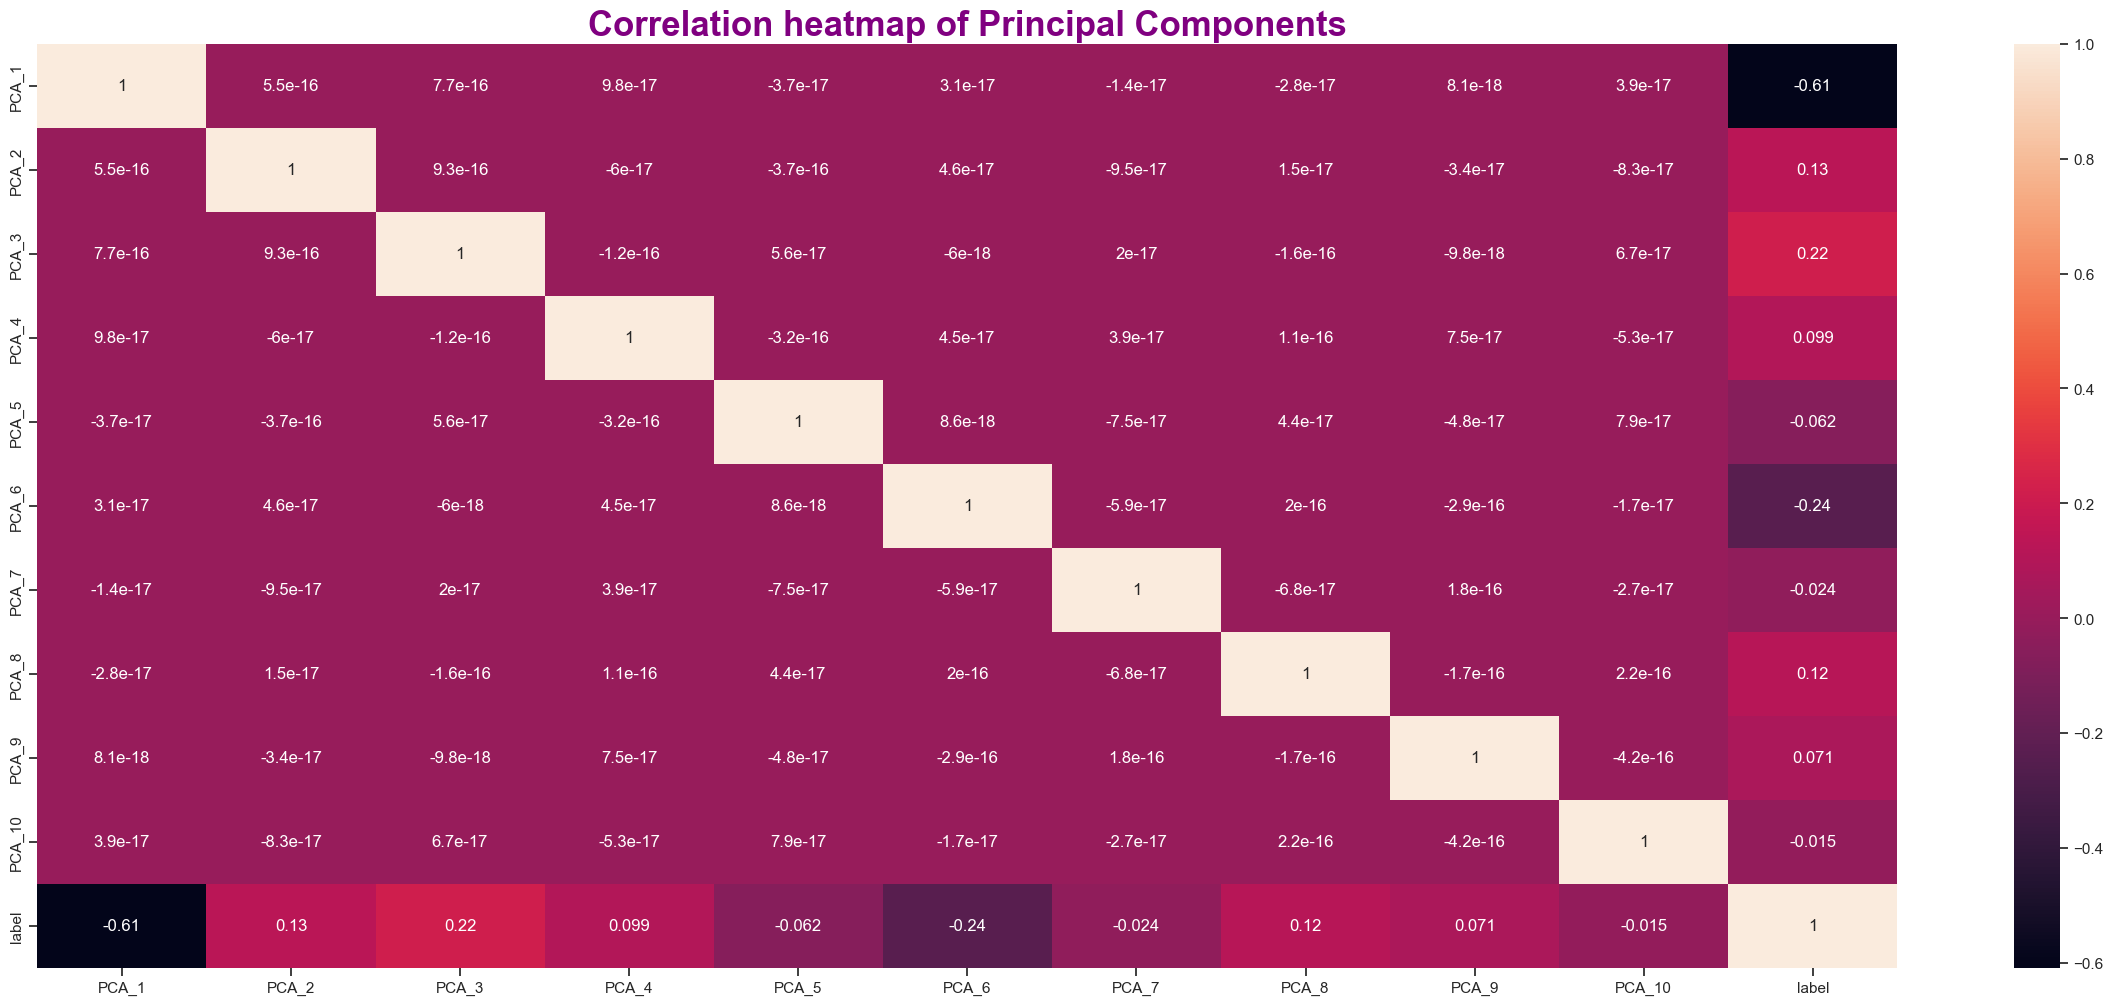

In [20]:
#list for x labels and y labels for the heatmap
labels = [
    'PCA_1','PCA_2','PCA_3','PCA_4','PCA_5',
    'PCA_6','PCA_7','PCA_8',
    'PCA_9','PCA_10',
    'label'
    ]
# ylabels = [
#     'PCA_1','PCA_2','PCA_3','PCA_4','PCA_5',
#     'PCA_6','PCA_7','PCA_8',
#     # 'PCA_9','PCA_10',
#     'label'
#     ]

#creates a new or existing figure for plotting dimension passed as tuple
fig = plt.figure(figsize=(30, 12))

#configure title of the existing plot, arguments are passed accordingly
plt.title(
    'Correlation heatmap of Principal Components', 
    color='Purple', fontsize=25,
    fontweight='bold'
    )

#creates a heatmap of the np array (matrix), labels for x and y axis 
#mentioned earlier are passed as argumnets
sns.heatmap(
    pd.DataFrame(np.column_stack((X_pca, y))).corr(), annot=True, 
    xticklabels=labels, yticklabels=labels, 
)

multicollinearity  diminished drastically among every pair of predictors

### Apply isomap Embedding

In [21]:
#Isomap embedding was also used to extract 8 feature similar to PCA
iso = Isomap(n_components=10, n_neighbors=5)
X_iso = iso.fit_transform(X)

# Split processed data (after PCA and ISOmap embedding) into test, train pair

In [22]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, random_state=8, test_size=0.2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=8
)

X_train_iso, X_test_iso, y_train_iso, y_test_iso = train_test_split(
    X_iso, y, random_state=8, test_size=0.2
)


##        <font color=blue>C. DESCRIPTION OF MODELS EXPLORED TO PREDICT HEART DISEASE</font>

Two classifier algorithms were explored
1. logistic regression
2. Support Vector Machine (SVM)


### <font color=blue>Logistic regression models using all 21 features vs 8 PCA features vs 8 features (IsoMap Embedding)<font>

In [23]:
#logistic regression models were created lgr_model with uses 21 features that
#prior to dimension reduction
#lgr_model_pca which uses 8 pca features was created
#lgr_model_iso which uses the 8 isomap features was created 
#the model was created using the follwing hyparameters passed as parameters 
#when the LogisticRegression instances are created

#penalty argumeny decides whether there is regularization and the 
#approach to use
#solver desides what solver to use for fitting the model
#C argument is a positive float number that defines the strength of 
#the regularizatioon used
lgr_model = LogisticRegression(
    penalty='l2', C=1.0, solver='liblinear', max_iter=100
    )
lgr_model_pca = LogisticRegression(
    penalty='l2', C=1.0, solver='liblinear', max_iter=100
    )
lgr_model_iso = LogisticRegression(
    penalty='l2', C=1.0, solver='liblinear', max_iter=100
    )


#the timeit function from the timeit class was used to time the execution of
#the model fitting. timeit by default runs an execution passed as a string 
#argument a million times and best the best time of the million test. 
#it is important to used a setup argument to import the logisticRegression 
#class so that it can be made to the timeit function. to avoid an error. 

#time to train the model using without any dimension reduction
t = timeit.timeit(str(lgr_model.fit(X_train, y_train)),
                  setup='from __main__ import LogisticRegression'
)

#time to train the model using PCA features
t_pca = timeit.timeit(str(lgr_model_pca.fit(X_train_pca, y_train_pca)),
                      setup='from __main__ import LogisticRegression',
)

#time to train the model using IsoMap embedded features
t_iso = timeit.timeit(str(lgr_model_iso.fit(X_train_iso, y_train_iso)),
                      setup='from __main__ import LogisticRegression'
)


#df is a dataframe created here to tabulate the different logistic regresion
#models and their respective execution time
df = pd.DataFrame(
    {
    'Lgr model no dimension reduction': [
    lgr_model.score(X_test, y_test), t
    ],
    'Lgr model with PCA (10 features)': [
    lgr_model_pca.score(X_test_pca, y_test), t_pca
    ],
    'lgr model with isomap(10 features)': [
    lgr_model_iso.score(X_test_iso, y_test), t_iso
    ]
     },
    index=['Accuracy', ' best execution time (s)']
    )

#index arguments passed to name the indexs of the table, dictionary 
#was used to create the table with columns serving as dictionary keys, 
#and respective column contents serving as dictionary values
df

,Lgr model no dimension reduction,Lgr model with PCA (10 features),lgr model with isomap(10 features)
Accuracy,0.861345,0.852941,0.840336
best execution time (s),0.906475,0.949523,0.886948


PCA model doesn't comprise a lot, the trade off between complexity and accuracy is too bad to be fair, that model was selected, this can be further modified. Hyperparameter tunning was then used to find the optimal hyperparamters for the pca logistic regresion model. 
Accuracy here is the ratio of correctly predicted instances to the total number of instances in the test field.


### Performing hyperparameter tunning on the PCA logistic regression model...cross validation

For hyperparameter tunning sklearn's `GridSearchCV` was used. GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used. It utilizes cross validation, in cross validation is a resampling technique where data is split into test and split in such a way that every portion or fold is tested exactly once after all iterations.  Cross validation helps to give an overall description of the performance of a model before deployment, with cross validation a developer can compare how different models stack up against eachother. Hyperparameter tunning entails tweaking hyperparamaters of models and see how well performance is improved. With `GridSearchcv` this is done in a systematic manner trying every combination as opposed to writting multiple bulky for loops. RandomSearch is another hyperparameter tunning algorithm but it is less commonly used; it only does randomn combinations.

It is worth mentioning that when performing hyperparameter tunning the training data_set should be further split into training and validation subset this is import to avoid overfitting models. This could be a common mistaken made when developers perform using all the dataset, that is the original training and testing dataset

In [24]:
#instantiate LogisticRegression object
lgr = LogisticRegression()


#create dictionary of hyperparameters-key and possible values-values
#penalty, C, ssolver, max_iter are the hyperparamters and have to be strings
#in the dictionary
hyper_params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
     'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0],
     'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga',],
     'max_iter': [100, 120, 150, 200]
     
}

#perfomes greadsearchobject does exhaustive search
#the untunned lgr is passed as a positional argument
#hyperparameters and possible values passed as a keyword argument
#cv refers to the number of cross validations to evaluate model
#verbose is set to True so computation times are displayed
#n_jobs was set to 1, -1 implies all processors used

#clf here refers to the classifier
clf = GridSearchCV(lgr, param_grid=hyper_params, cv=5, verbose=True, n_jobs=1)

#ffind the best classifier hyperparameters using all the training dataset, 
#during the cross validation the training data while be further split into 
#training and validation subsets on every iteration systematically.
clf.fit(X_train_pca, y_train_pca)


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


c:\Users\chigo\anaconda3\envs\EnvironmentA\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1560 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chigo\anaconda3\envs\EnvironmentA\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chigo\anaconda3\envs\EnvironmentA\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\chigo\anaconda3\envs\EnvironmentA\lib\site-packages\sklearn\line

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0],
                         'max_iter': [100, 120, 150, 200],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

Some combinations failed and have NaN values since they do not go together, like l1 penalty and newton-cg solver

In [25]:
#this cell contains code to summarize all the hyperparamters
df = pd.DataFrame(clf.cv_results_)

#the portion of table needed were selecting using column names
#and ascending was set to False to arrange in descending order

#the sort_values method was to sort the whole dataframe based on the column
#'mean_test_scores` in descending order.`
df[
    [
    'param_penalty','param_C', 'param_max_iter', 
    'param_solver', 'mean_test_score']
].sort_values('mean_test_score', ascending=False)



,param_penalty,param_C,param_max_iter,param_solver,mean_test_score
469,l2,1.0,200,saga,0.847672
445,l2,1.0,150,lbfgs,0.847672
405,l2,1.0,100,lbfgs,0.847672
406,l2,1.0,100,newton-cg,0.847672
407,l2,1.0,100,liblinear,0.847672
...,...,...,...,...,...
475,None,1.0,200,lbfgs,NaN
476,None,1.0,200,newton-cg,NaN
477,None,1.0,200,liblinear,NaN
478,None,1.0,200,sag,NaN


The table above(dataFrame) above provides summary of all models and hyperparameters ranked from best mean_test_score tio least mean test score

In [26]:
#the .best_estimator returns the logistic model with the best model
best_lgr = clf.best_estimator_

#print to the notebook the best hyperparamters found
print(
    'The hyperparameters of the best logistic regression model are:',
    f'{best_lgr}, {clf.best_params_}'
    )

The hyperparameters of the best logistic regression model are: LogisticRegression(), {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


### <font color=blue>Performance evaluation of best logistic regresssion model<font>

In [27]:
#once again df was used to tabulate, compare pca_logreg model before and after
#hyperparameter tunning

#index arguments passed to name the indexs of the table, dictionary 
#was used to create the table with columns serving as dictionary keys, 
#and respective column contents serving as dictionary values
df = pd.DataFrame(
    {'previous lgr_model_ no tunning (10 PCA features)': [
    lgr_model_pca.score(X_test_pca, y_test_pca)
    ],
    'Tuned lgr model with best hyperparameters (10 PCA features)' : [
    best_lgr.score(X_test_pca, y_test_pca)
    ],
     }, index=['Accuracy score']
)
df

,previous lgr_model_ no tunning (10 PCA features),Tuned lgr model with best hyperparameters (10 PCA features)
Accuracy score,0.852941,0.852941


Accuracy of a classifier model is the ratio of the total number of correct predictions to the number of predictions made i.e  


$\frac{TP + TN}{TP + TN + FP + FN}$


Values can lie between 0-1. Accuracy is not sufficient alone, especially in cases where there is class imbalance

### <font color=green>Classification report of the best logistic regression model -`final logistic regression model`<font>

In [28]:
#print a summary of the clasification report of the 
#final logistic regression model
print(classification_report(y_test, best_lgr.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       112
           1       0.84      0.89      0.86       126

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



the index `0` there refers to class 0 that is `Normal` and `1` refers to the class `heart disease`

Precision:      This is the ability of a  classifier not to label as positive a sample that is truly negative. Value lies between `0` and `1`   where `0` is the worst case and `1` is the best case. Precision is a measure of quality.

precision = $ \frac{TP}{TP + FP}$


Recall:         This is the ability of a classifier not to produce fale negatives. It answers the question of what fraction of actually positives were correctly classified. as false negatives reduce so does recall increase.

Recall = $ \frac{TP}{TP + FN}$


f1-score: F1 score combines the precision and recall metric into one. F1 score is the harmonic mean of precision and recall, ideally the aim is for f1=recall=precision.  F1 score is given as below


f1_score = $ \frac{2 * precision * recall}{precision + recall}$



### <font color=green>Confusion matrix of the best logistic regression model<font>

Confusion matrix is a matrix of different combinations of predicted values and actual values for every class. that is True positives, True negatives, false positives, and false negatives.

In [29]:
#the confusion_matrix object returns a 2d numpy array representing the 
#confusion matrix, true labels and predicted label completely represented
cfmtrix = confusion_matrix(y_test_pca, best_lgr.predict(X_test_pca))
cfmtrix

array([[ 91,  21],
       [ 14, 112]], dtype=int64)

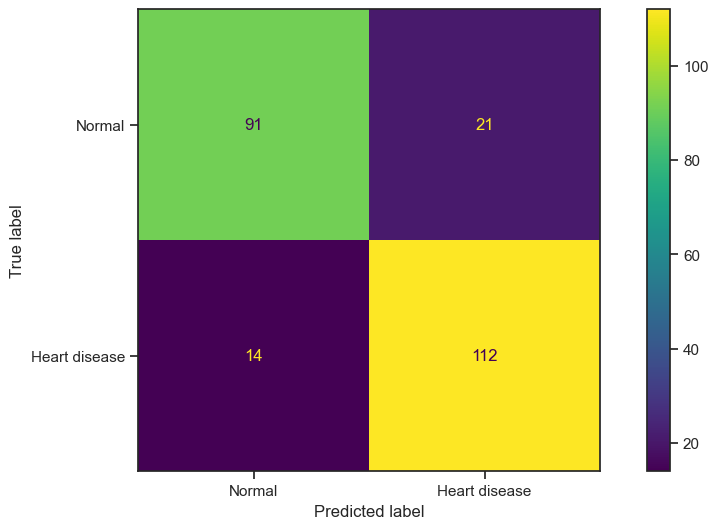

In [30]:
#The ConfusionMatrixDisplay aids in plotting consfusion matrix(np array)
#using a .plot() method
cmatrix_plot = ConfusionMatrixDisplay(
confusion_matrix=cfmtrix,
display_labels=[
        'Normal', 'Heart disease',
        ]
    )
#returns the figure and axis, creates a subplot
fig, ax = plt.subplots(figsize=(12,6))

#does  a confusion matrix plot the axis is passed as an argument to `ax`
cmatrix_plot.plot(ax=ax)

### <font color=green>ROC and AUC for the best logistic regression model - `Final logistic regression model`<font>

In [31]:
#the function declaratipn of the `roc_auc_plot` function
#used further into the report
def roc_auc_plot(model, y_tst, x_tst, lbl):
    ''' 
    Custom function created to plot roc and report area under curve.

    Parameters:
        model: the machine learning model to be evaluated
        y_tst: the test target vector
        x_tst: the test predictor matrix
        lbl: name of the ML model used as a lbl in the plot

    Returns:
        None
    '''
    #uses the 'roc_auc_score` function imported earlier to get auc (float)
    roc_auc = roc_auc_score(y_tst, model.predict(x_tst))

    #returns tuple of 3 elements all numpy arrays corresponding to 
    #sensitivity values, 1 minus specificity values and thresholds 
    sens, one_minus_specs, thr = roc_curve(y_tst, model.predict(x_tst))

    #create plot, set the dimension passed as aa tuple 12 X 5
    plt.figure(figsize=(12, 5))

    #plot the roc
    plt.plot(sens, one_minus_specs, label=f'{lbl} (area = {roc_auc:2f})')
    #plot the diagonal that cuts across the roc with an auc of 0.5
    plt.plot([0, 1], [0, 1], 'r--')

    #set the limits of the x axis, passed as a list
    plt.xlim([0.0, 1.0])

    #limits of y axis
    plt.ylim([0.0, 1.05])

    #label of x axis
    plt.xlabel('1 - specificity')

    #label of y axis
    plt.ylabel('Sensitivity')

    #titles the plot
    plt.title('Receiver Operating Characteristics (ROC)')
    #sets legend to lower right of the plot
    plt.legend(loc='lower right')
    #show grid lines
    plt.grid()
    #ensures the plot is displayed to the notebook
    plt.show()

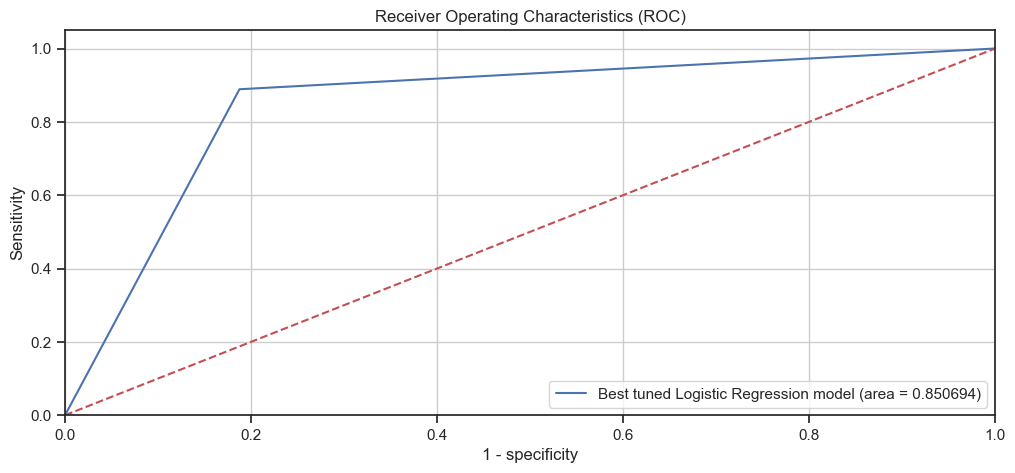

In [32]:
#calls the custom `roc_auc_plot` function created earlier to plot roc
#and calculate auc
roc_auc_plot(
    model=best_lgr, y_tst=y_test, 
    x_tst=X_test_pca, 
    lbl='Best tuned Logistic Regression model'
)

sensitivity also referred to as True positive rate or recall is the probability that a positive prediction is actually positive. It tests how well the test catches true positive cases.


Specificity measures how well a model avoids false alarms.

ROC (Receiver operating characteristic) curve is a plot of specificity against false positive rate. The aim is to have an roc with a high true positive rate and low false positive rate. false positive rate = 1 - specificity.

The AUC (Area under the curve) is literally the area under the ROC, since the two axis go from 0 to 1, the maximum possible value for this is 1. ROC is a curve of probability.


### <font color=blue>Support vector Machine Classifier<font>

In [33]:
#creates 3 support vector machine classifiers for no dimenion reduction
#pca dimension reduction and isomap embedding dimension reduction. named 
#accordingly using intelligible names
svm = SVC()
svm_pca = SVC()
svm_iso = SVC()

#the timeit function from the timeit class was used to time the execution of
#the model fitting. timeit by default runs an execution passed as a string 
#argument a million times and best the best time of the million test. 
#it is important to used a setup argument to import the SVC 
#class so that it can be made to the timeit function. to avoid an error. 

#time to train the model using without any dimension reduction
t = timeit.timeit(
    str(svm.fit(X_train, y_train)), 
    setup='from __main__ import SVC'
)
#time to train the model using PCA features
t_pca = timeit.timeit(
    str(svm_pca.fit(X_train_pca, y_train_pca)), 
    setup='from __main__ import SVC'
)

#time to train the model using IsoMap embedded features
t_iso = timeit.timeit(
    str(svm_iso.fit(X_train_iso, y_train_iso)), 
    setup='from __main__ import SVC'
)

#df is a dataframe created here to tabulate the different logistic regresion
#models and their respective execution time
df = pd.DataFrame(
    {
    'svm model no dimension reduction': [
    svm.score(X_test, y_test), t
    ],
    'svm model with PCA (10 features)': [
    svm_pca.score(X_test_pca, y_test_pca), t_pca
    ],
    'svm model with isomap(10 features)': [
    svm_iso.score(X_test_iso, y_test_iso), t_iso
    ]
     },
    index=['Accuracy', 'best execution time (s)']
    )


#index arguments passed to name the indexs of the table, dictionary 
#was used to create the table with columns serving as dictionary keys, 
#and respective column contents serving as dictionary values
df

,svm model no dimension reduction,svm model with PCA (10 features),svm model with isomap(10 features)
Accuracy,0.878151,0.873950,0.886555
best execution time (s),2.966139,3.027721,3.040507



### <font color=green>Performing hyperparameter tunning on the PCA logistic SVM model...cross validation is used to calculate mean test scores<font>

In [34]:
#instantiate Support Vector Machine classifier object as svm
svm = SVC()

#create dictionary of hyperparameters-key and possible values-values
#shrinking, C, kernel,degree, gamma are the hyperparamters 
#and have to be strings in the dictionary
hyper_params = {
     'C': [0.1, 0.2, 1.0, 2.0, 3.0],
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid', ],
     'degree': [1, 2, 3],
     'gamma': ['scale', 'auto'],
     'shrinking': [True, False]
     
}

#performes greadsearchobject does exhaustive search
#the untunned lgr is passed as a positional argument
#hyperparameters and possible values passed as a keyword argument
#cv refers to the number of cross validations to evaluate model
#verbose is set to True so computation times are displayed
#n_jobs was set to 1, -1 implies all processors used

#clf here refers to the classifier
clf = GridSearchCV(svm, param_grid=hyper_params, cv=5, verbose=True, n_jobs=1)

#find the best classifier hyperparameters using all the training dataset, 
#during the cross validation the training data will be further split into 
#training and validation subsets on every iteration systematically.
clf.fit(X_train_pca, y_train_pca)




Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 0.2, 1.0, 2.0, 3.0], 'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]},
             verbose=True)

In [35]:
#this cell contains code to summarize all the hyperparamters
df = pd.DataFrame(clf.cv_results_)

#the portion of table needed  from the line of code above 
# were selecting using column names
#and ascending was set to False to arrange in descending order
#the sort_values method was to sort the whole dataframe based on the column
#'mean_test_scores` in descending order.`
df[
    [
    'param_kernel','param_C', 'param_degree', 
    'param_gamma', 'param_shrinking', 'mean_test_score']
].sort_values('mean_test_score', ascending=False)

,param_kernel,param_C,param_degree,param_gamma,param_shrinking,mean_test_score
197,rbf,3.0,1,scale,False,0.858159
196,rbf,3.0,1,scale,True,0.858159
229,rbf,3.0,3,scale,False,0.858159
228,rbf,3.0,3,scale,True,0.858159
212,rbf,3.0,2,scale,True,0.858159
...,...,...,...,...,...,...
26,poly,0.1,2,auto,True,0.657542
74,poly,0.2,2,auto,True,0.656495
75,poly,0.2,2,auto,False,0.656495
19,poly,0.1,2,scale,False,0.656495


The table above(dataFrame) above provides summary of all models and hyperparameters ranked from best mean_test_score tio least mean test score

In [36]:
#the .best_estimator returns the svm model with the best model
best_svm = clf.best_estimator_

#print to the notebook the best hyperparamters found
print(
    'The hyperparameters of the best svm Classifier model are:',
    f'{best_svm}, {clf.best_params_}'
    )

The hyperparameters of the best svm Classifier model are: SVC(C=3.0, degree=1), {'C': 3.0, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}


### <font color=blue>Performance evaluation of best logistic regresssion model<font>

In [37]:
#once again df was used to tabulate, compare pca_logreg model before and after
#hyperparameter tunning

#index arguments passed to name the indexs of the table, dictionary 
#was used to create the table with columns serving as dictionary keys, 
#and respective column contents serving as dictionary values
df = pd.DataFrame(
    {'previous svmmodel_with (10 PCA features)': [
    svm_pca.score(X_test_pca, y_test_pca)
    ],
    'Tuned svm model best hyperparameters': [
    best_svm.score(X_test_pca, y_test_pca)
    ],
     }, index=['Accuracy score']
)
df

,previous svmmodel_with (10 PCA features),Tuned svm model best hyperparameters
Accuracy score,0.87395,0.882353


The tuned svm model performs better now, now for a complete analysis of the model. Confusion matrix, ROC (receiver operating characteristic) and AUC (Area under the curve) were used

### <font color=green>Classification report of the best svm model -`final svm model`<font>

In [38]:
#print a summary of the clasification report of the 
#final svm model
print(classification_report(y_test, best_svm.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       112
           1       0.87      0.92      0.89       126

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



the index `0` there refers to class 0 that is `Normal` and `1` refers to the class `heart disease`

### <font color=green>Confusion matrix of the best svm model<font>

In [39]:
#the confusion_matrix object returns a 2d numpy array representing the 
#confusion matrix, true labels and predicted label completely represented
cfmtrix = confusion_matrix(y_test, best_svm.predict(X_test_pca))
cfmtrix

array([[ 94,  18],
       [ 10, 116]], dtype=int64)

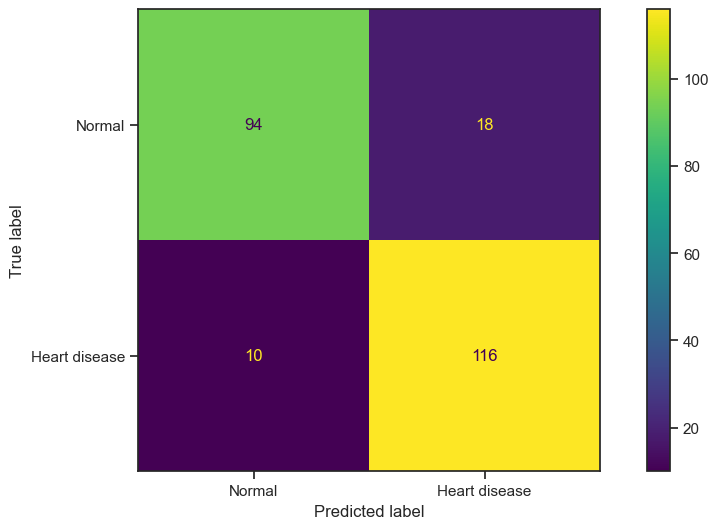

In [40]:
#The ConfusionMatrixDisplay aids in plotting consfusion matrix(np array)
#using a .plot() method
cmatrix_plot = ConfusionMatrixDisplay(
confusion_matrix=cfmtrix,
display_labels=[
        'Normal', 'Heart disease',
        ]
    )
#returns the figure and axis, creates a subplot
fig, ax = plt.subplots(figsize=(12,6))
#does  a confusion matrix plot the axis is passed as an argument to `ax`
cmatrix_plot.plot(ax=ax)

### <font color=green>ROC and AUC for the best svm model - `Final svm model`<font>

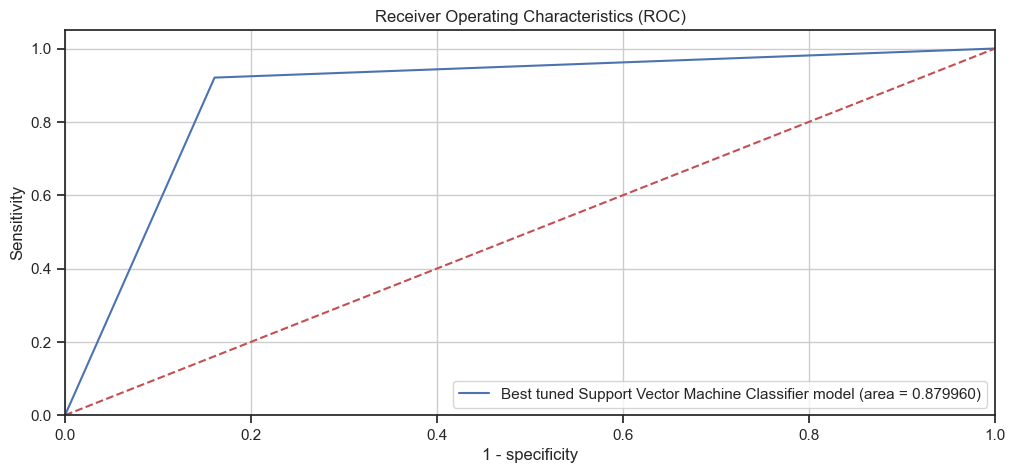

In [41]:
#calls the custom `roc_auc_plot` function created earlier to plot roc
#and calculate auc
roc_auc_plot(
    model=best_svm, y_tst=y_test, 
    x_tst=X_test_pca, 
    lbl='Best tuned Support Vector Machine Classifier model'
)

# <font color=blue>D. JUSTIFICATION OF DATA SELECTION METHODS FOR TRAINING AND TESTING<font>

The development of machine learning models involves at its core training a model and testing said models. Training is done using a training dataset and testing is done using the test dataset; the performance of the model is done by comparing how well the model predicts/classifies looking at the results derived from the test data and actual target test data. These subsets are derived from the original data after preprocessing. The whole point of splitting is to prevent against overfitting, overfitting (low bias) means that the model would tend to have a high variance in the field (future predictions and clasification after the model is deployed). High variance is a result of poor generalization of a machine learning model in the field. In this report `train_test_split` function was used to split various dataset into training and testing subsets. The argument `random` was set to 8 throughout for consistency so that identical subsets can be recreated everytime the notebook is run. 

When it comes to hyperparameter tunning, which was done to optimize both logistic regression and support vector machine models, the initial test data was never touched. The initial test data was not touched until the end when evaulating the model decided upon after hyperparameter tunning. In hyperparamter tunning it is important to have a complete picture of the performance considering the various combination of hyperparameters (Grid Search). This is very important because the same classifier model/algorithm with the same hyperparameters could have different metric scores depending on how the data set is split. Cross validation paints a complete picture of performance across all the dataset because at every iteration there is a different validation dataset and training dataset derived from the original dataset, in such a way that the whole of the data is used to evaluate the model. Hence the reason `cross validation` was done along with `Grid Search` hyperparamter tunning (the cv argument in the GridSearchCV instantiation seen in the report).

After hyperparamter tunning using the training data alone, then testing can now be done using the test dataset alone! Now this can now correctly infer/mirror how the model is expected to behave in the field. Including test data in training would reduce bias and increase variance which is undesirable!

# <font color=blue>E. ANALYSIS OF PERFROMANCE OF THE TWO MODELS (The 'final' logistic regression model vs the 'final' Support Vector Machine Classifier model)<font>

Between both models the final svm model seems to perform better, higher accuracy scores and AUC value. For classifiers metrics like F score, Precision, recall, AUC, ROC, and Confusion matrices are used as opposed to R score and MSE (Mean square error) for linear regression models. These performance metrics paint a good picture of how well the classifier classifies. 

Comparing between the two final models. The svm model had better average precision, recall and F1-scores (0.88 across the board) compared to the logistic regression model that an average values of 0.85 across the board. But this is sufficient enough to come to a conclusion. That was why the roc and auc was further investigated. ROC takes into account all the threshold setting, it is a plot of sensitivity (true positive rate) against 1 - specificity i.e false negative rate. The general idea is to have sensitivity approaching 1 and specificity approaching 1. AUC is the area under the ROC curve and tells how well the classifier is able to distinguish between the two classes. From the report svm can be seen to also perform better having a better ROC curve and AUC value. The table below summarizes how the two classifier models stack up against each other

In [42]:
#dictionary is used to structure the dataframe and index are passed as a list 
df = pd.DataFrame({'`final` svm model':[
    0.879960, 'better', 0.88, 0.88, 0.88, 0.882353
    ],
                   '`final` logistic Regression model':[
    0.850694, 'good', 0.85, 0.85, 0.85, 0.852941
    ]
                   }, index=[
    'AUC', 'ROC', 'Precison', 'Recall', 'F1-score', 'Accuracy'
    ])

df

,`final` svm model,`final` logistic Regression model
AUC,0.87996,0.850694
ROC,better,good
Precison,0.88,0.85
Recall,0.88,0.85
F1-score,0.88,0.85
Accuracy,0.882353,0.852941


# <font color=blue>F. CONCLUSION<font>

A classifier model to detect between heart diseases and normal heart condition was able to be developed from the IEEE heart Disease dataset. Two training algorithm were proposed, a logistic regression algorithm and a support vector machine classifier algoritgm. The model trained using support vector machine classifier was selected after considering all significant performance metrics that is precision, recall, F1 score, ROC and AUC which all stem from confusion matrices. An explanable AI methodology was applied to illustrate every step that lead up until the final selection from data visualization, exploration all the way to feature selectio(dimension reduction); every decision taken was well explained in a concise and intelligent manner. Dimension reduction was explained explicity and reasons were given as to why that approach was taken rather than some filtering of features based of off only multicollinearity.

Hyperparameter tunning helps to control the process of model training. hyperparameters includes parameters that can be tweaked during model training. The essence of doing hyperparamter tunning is to control training optimizing for maybe cost or performance, but in this report hyperparamater tunning was done to slightly reduce bias in the training process. 

The report captures majority of the concepts that have been discussed in class especially concepts partaining to classification problems.


As a sugggestion more classifier model algorithms could be investigated, like using of artificial neural network which provides more reburst control in training. Multiplayer perceptron classifer could be used, even reducing more bias guaranteeing better performance in testing. 

